# EEG Power Visualization on Electrode Map

This notebook allows you to:
1. Load EEG data from CSV
2. Extract time windows
3. Compute Power Spectral Density (PSD) in a specific frequency band
4. Visualize power across electrode locations with a head-shaped map

**Color coding:** Red = high power, Blue = low power

## Setup and Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse, Polygon
from matplotlib.colors import Normalize
import matplotlib.cm as cm
import json
from scipy.signal import welch, periodogram
from pathlib import Path
import sys

# Add the utils directory to the path
sys.path.insert(0, '/Users/sean/LINK/MEEG')

print("Imports successful!")

Imports successful!


## Load the EEGPowerVisualizer class

In [2]:
# Import the visualizer class from the Figure1E.py file
import importlib.util
spec = importlib.util.spec_from_file_location("figure1e", "/Users/sean/LINK/MEEG/Figure/Figure1E.py")
figure1e = importlib.util.module_from_spec(spec)
spec.loader.exec_module(figure1e)

EEGPowerVisualizer = figure1e.EEGPowerVisualizer
print("EEGPowerVisualizer class loaded!")

EEGPowerVisualizer class loaded!


## Configuration

In [3]:
# File paths
csv_path = "/Volumes/CHOO'S SSD/LINK/1. 박진봉 교수님 데이터/1st_trial/processed_b_channels_2000hz_80hz_filtered.csv"
electrode_map_path = "/Users/sean/LINK/MEEG/electrode_map/Version2_Fixed.json"

# EEG parameters
sampling_rate = 2000  # Hz - from the filename

# Initialize visualizer
visualizer = EEGPowerVisualizer(csv_path, electrode_map_path, sampling_rate)

Data loaded: 1200000 samples at 2000 Hz
Duration: 600.00 seconds
Channels: 14
Electrodes in map: 16
Channel mapping available: True


## Explore Data Duration

In [4]:
total_samples = len(visualizer.data)
total_duration = total_samples / sampling_rate

print(f"Total duration: {total_duration:.2f} seconds ({total_duration/60:.2f} minutes)")
print(f"Total samples: {total_samples}")
print(f"Channels available: {len(visualizer.data.columns)}")
print(f"\nChannel names: {list(visualizer.data.columns)[:20]}")

Total duration: 600.00 seconds (10.00 minutes)
Total samples: 1200000
Channels available: 14

Channel names: ['time', 'P4', 'C2', 'F4', 'Pz', 'O1', 'T1', 'T5', 'P3', 'C1', 'Fz', 'O2', 'T2', 'T6']


## Visualization 1: Basic Power Map

Adjust the `start_time`, `duration`, and `freq_band` parameters below:


Visualizing EEG Power: 5-15 Hz

Extracted window: 0 to 10000 samples (5.00s)

Computing power in 5-15 Hz band using Welch's method:
P4: 105.176440 µV²/Hz (avg in 5-15 Hz)
C2: 87.700545 µV²/Hz (avg in 5-15 Hz)
F4: 60.452699 µV²/Hz (avg in 5-15 Hz)
Pz: 95.622895 µV²/Hz (avg in 5-15 Hz)
O1: 31.869723 µV²/Hz (avg in 5-15 Hz)
T1: 57.504531 µV²/Hz (avg in 5-15 Hz)
T5: 28.444567 µV²/Hz (avg in 5-15 Hz)
P3: 75.156312 µV²/Hz (avg in 5-15 Hz)
C1: 82.772649 µV²/Hz (avg in 5-15 Hz)
Fz: 90.727263 µV²/Hz (avg in 5-15 Hz)
O2: 38.618368 µV²/Hz (avg in 5-15 Hz)
T2: 69.632952 µV²/Hz (avg in 5-15 Hz)
T6: 76.327669 µV²/Hz (avg in 5-15 Hz)

Missing channels: {'F3', 'Fp2', 'Fp1'}
Interpolating power values for missing channels with distance decay...
  F3: 82.882645 µV²/Hz (interpolated, distance decay applied)
  Fp2: 76.290739 µV²/Hz (interpolated, distance decay applied)
  Fp1: 86.503136 µV²/Hz (interpolated, distance decay applied)

Generating plot...


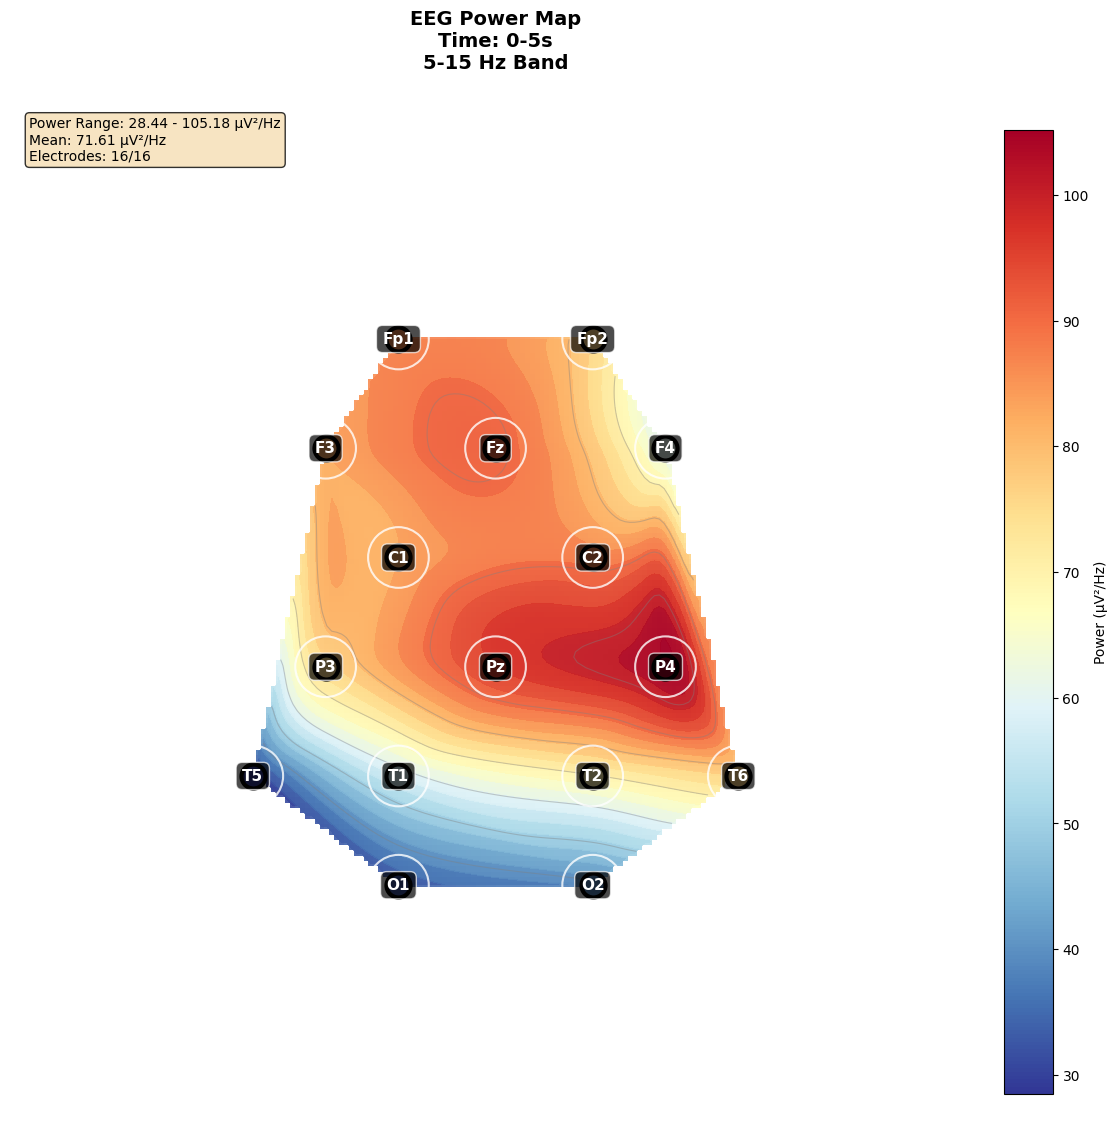

In [5]:
# ========== ADJUST THESE PARAMETERS ==========
start_time = 0      # Start time in seconds
duration = 5        # Duration in seconds
freq_band = (5, 15) # Frequency band in Hz
# ============================================

# Boundary electrodes for the interpolation region
boundary_electrodes = ['Fp1', 'Fp2', 'F4', 'T6', 'O2', 'O1', 'T5', 'F3']

fig, ax, power_values = visualizer.visualize(
    start_time=start_time,
    duration=duration,
    freq_band=freq_band,
    title=f"EEG Power Map\nTime: {start_time}-{start_time+duration}s",
    boundary_electrodes=boundary_electrodes
)

plt.tight_layout()
plt.show()

## Visualization 2: Compare Multiple Frequency Bands

Extracted window: 0 to 20000 samples (10.00s)

Processing Delta (0.5-4 Hz)...
P4: 745.545113 µV²/Hz (avg in 0.5-4 Hz)
C2: 693.747066 µV²/Hz (avg in 0.5-4 Hz)
F4: 465.074520 µV²/Hz (avg in 0.5-4 Hz)
Pz: 653.779426 µV²/Hz (avg in 0.5-4 Hz)
O1: 221.253015 µV²/Hz (avg in 0.5-4 Hz)
T1: 418.125917 µV²/Hz (avg in 0.5-4 Hz)
T5: 217.236577 µV²/Hz (avg in 0.5-4 Hz)
P3: 624.698822 µV²/Hz (avg in 0.5-4 Hz)
C1: 667.410427 µV²/Hz (avg in 0.5-4 Hz)
Fz: 613.243281 µV²/Hz (avg in 0.5-4 Hz)
O2: 250.311541 µV²/Hz (avg in 0.5-4 Hz)
T2: 457.284662 µV²/Hz (avg in 0.5-4 Hz)
T6: 440.671263 µV²/Hz (avg in 0.5-4 Hz)

Missing channels: {'F3', 'Fp2', 'Fp1'}
Interpolating power values for missing channels with distance decay...
  F3: 631.881794 µV²/Hz (interpolated, distance decay applied)
  Fp2: 556.985232 µV²/Hz (interpolated, distance decay applied)
  Fp1: 617.897336 µV²/Hz (interpolated, distance decay applied)

Processing Theta (4-8 Hz)...
P4: 226.174696 µV²/Hz (avg in 4-8 Hz)
C2: 207.337006 µV²/Hz (avg in 4-

/var/folders/g4/80l_4jg54rlcq9by8gjj21s40000gn/T/ipykernel_55862/600153867.py:45: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = cm.get_cmap('RdYlBu_r')
/var/folders/g4/80l_4jg54rlcq9by8gjj21s40000gn/T/ipykernel_55862/600153867.py:45: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = cm.get_cmap('RdYlBu_r')
/var/folders/g4/80l_4jg54rlcq9by8gjj21s40000gn/T/ipykernel_55862/600153867.py:45: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = c

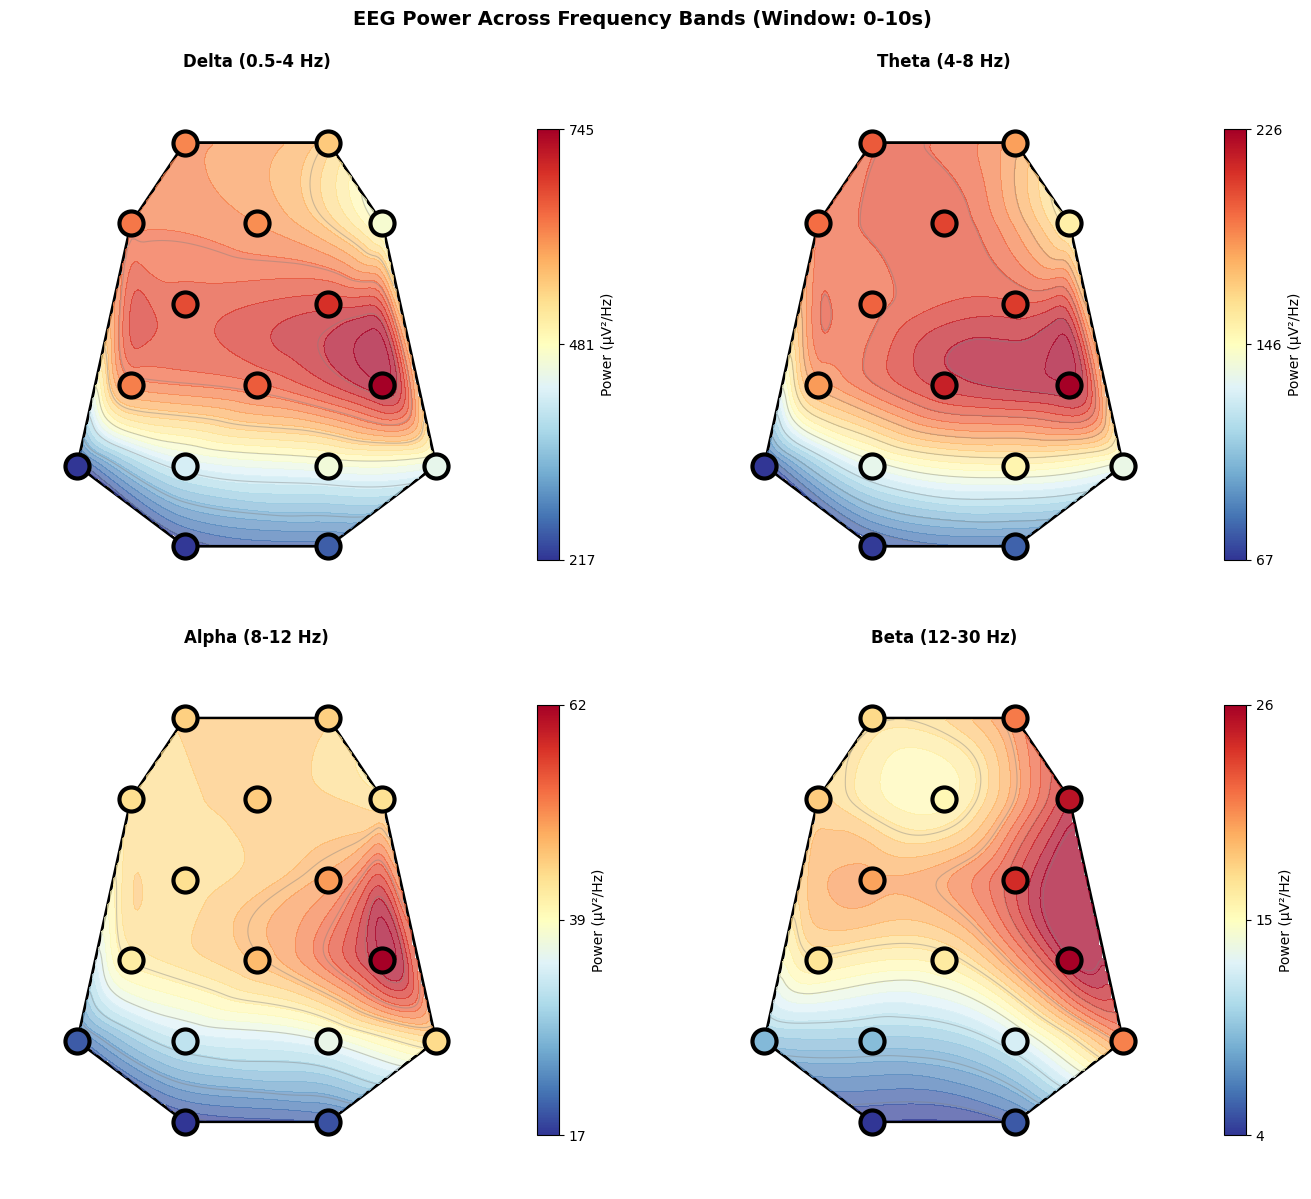


Comparison complete!


In [6]:
# Define multiple frequency bands
freq_bands = [
    ((0.5, 4), "Delta (0.5-4 Hz)"),
    ((4, 8), "Theta (4-8 Hz)"),
    ((8, 12), "Alpha (8-12 Hz)"),
    ((12, 30), "Beta (12-30 Hz)"),
]

# Extract the same time window for all
start_time = 0
duration = 10  # seconds

window_data = visualizer.extract_window(start_time, duration)

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
axes = axes.flatten()

all_power_values = {}

# Electrodes defining the boundary region for interpolation
boundary_electrodes = ['Fp1', 'Fp2', 'F4', 'T6', 'O2', 'O1', 'T5', 'F3']

for idx, (freq_range, band_name) in enumerate(freq_bands):
    print(f"\nProcessing {band_name}...")
    
    # Compute power
    power_values = visualizer.compute_psd_power(window_data, freq_band=freq_range)
    all_power_values[band_name] = power_values
    
    # Plot on current axis
    ax = axes[idx]
    
    # Extract and normalize power
    channels = list(power_values.keys())
    powers = np.array(list(power_values.values()))
    
    power_min, power_max = powers.min(), powers.max()
    
    if power_max > power_min:
        norm = Normalize(vmin=power_min, vmax=power_max)
    else:
        norm = Normalize(vmin=0, vmax=1)
    
    colormap = cm.get_cmap('RdYlBu_r')
    
    # Get electrode positions and coordinates for all electrodes
    electrode_positions = []
    electrode_powers_list = []
    
    for elec_num, coords in sorted(visualizer.electrode_coords.items()):
        channel = coords['channel']
        if channel in power_values:
            x = coords['x'] * 2
            y = coords['y'] * 2
            electrode_positions.append([x, y])
            electrode_powers_list.append(power_values[channel])
    
    electrode_positions = np.array(electrode_positions)
    electrode_powers_list = np.array(electrode_powers_list)
    
    # Create interpolation grid
    from scipy.interpolate import griddata
    from scipy.spatial import Delaunay
    grid_resolution = 150
    x_min, x_max = electrode_positions[:, 0].min() - 1, electrode_positions[:, 0].max() + 1
    y_min, y_max = electrode_positions[:, 1].min() - 1, electrode_positions[:, 1].max() + 1
    
    grid_x, grid_y = np.meshgrid(
        np.linspace(x_min, x_max, grid_resolution),
        np.linspace(y_min, y_max, grid_resolution)
    )
    
    # Interpolate using cubic method
    grid_power = griddata(electrode_positions, electrode_powers_list, (grid_x, grid_y), method='cubic')
    grid_power_filled = griddata(electrode_positions, electrode_powers_list, (grid_x, grid_y), method='nearest')
    grid_power = np.where(np.isnan(grid_power), grid_power_filled, grid_power)
    
    # Create boundary mask
    boundary_coords = []
    for elec_name in boundary_electrodes:
        for elec_num, coords in visualizer.electrode_coords.items():
            if coords['channel'] == elec_name:
                boundary_coords.append([coords['x'] * 2, coords['y'] * 2])
                break
    
    if len(boundary_coords) >= 3:
        try:
            tri = Delaunay(np.array(boundary_coords))
            grid_points = np.column_stack([grid_x.ravel(), grid_y.ravel()])
            mask_flat = tri.find_simplex(grid_points) >= 0
            boundary_mask = mask_flat.reshape(grid_x.shape)
            grid_power = np.where(boundary_mask, grid_power, np.nan)
        except:
            pass
    
    # Plot the interpolated power field
    levels = np.linspace(power_min, power_max, 25)
    contourf = ax.contourf(grid_x, grid_y, grid_power, levels=levels, cmap=colormap, norm=norm, extend='both', zorder=2, alpha=0.7)
    
    # Add contour lines
    contour = ax.contour(grid_x, grid_y, grid_power, levels=8, colors='gray', alpha=0.4, linewidths=0.8, zorder=3)
    
    # Plot boundary line
    outline_coords = np.array(boundary_coords + [boundary_coords[0]])
    ax.plot(outline_coords[:, 0], outline_coords[:, 1], 'k-', linewidth=2, zorder=1)
    
    # Plot electrodes on top (NO LABELS)
    for channel in channels:
        electrode_num = visualizer._extract_electrode_number(channel)
        if electrode_num in visualizer.electrode_coords:
            coords = visualizer.electrode_coords[electrode_num]
            x, y = coords['x'] * 2, coords['y'] * 2
            power = power_values[channel]
            color = colormap(norm(power))
            
            ax.scatter(x, y, s=300, c=[color], edgecolors='black', linewidth=3, zorder=10, alpha=1.0)
            circle = plt.Circle((x, y), 0.25, fill=False, edgecolor='white', linewidth=1.5, zorder=9, alpha=0.8)
            ax.add_patch(circle)
    
    # Add colorbar with only 3 ticks: min, middle, max
    sm = cm.ScalarMappable(cmap=colormap, norm=norm)
    sm.set_array([])
    cbar = plt.colorbar(sm, ax=ax, label='Power (µV²/Hz)', shrink=0.8)
    
    # Calculate middle value and set only 3 ticks
    middle_value = (power_min + power_max) / 2
    cbar_ticks = [power_min, middle_value, power_max]
    cbar.set_ticks(cbar_ticks)
    cbar.set_ticklabels([f'{int(t)}' for t in cbar_ticks])
    
    ax.set_xlim(x_min - 0.5, x_max + 0.5)
    ax.set_ylim(y_min - 0.5, y_max + 0.5)
    ax.set_aspect('equal')
    ax.axis('off')
    ax.set_title(band_name, fontsize=12, fontweight='bold')

plt.suptitle(f'EEG Power Across Frequency Bands (Window: {start_time}-{start_time+duration}s)', 
             fontsize=14, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

print("\nComparison complete!")

## Visualization 3: Time-Varying Power Analysis

Analyze how power changes over time by examining multiple consecutive time windows:

Extracted window: 100000 to 104000 samples (2.00s)
P4: 101.273261 µV²/Hz (avg in 8-12 Hz)
C2: 123.509152 µV²/Hz (avg in 8-12 Hz)
F4: 84.841640 µV²/Hz (avg in 8-12 Hz)
Pz: 103.737378 µV²/Hz (avg in 8-12 Hz)
O1: 24.035288 µV²/Hz (avg in 8-12 Hz)
T1: 46.570191 µV²/Hz (avg in 8-12 Hz)
T5: 33.169030 µV²/Hz (avg in 8-12 Hz)
P3: 85.837669 µV²/Hz (avg in 8-12 Hz)
C1: 123.537791 µV²/Hz (avg in 8-12 Hz)
Fz: 98.431974 µV²/Hz (avg in 8-12 Hz)
O2: 27.250408 µV²/Hz (avg in 8-12 Hz)
T2: 56.684821 µV²/Hz (avg in 8-12 Hz)
T6: 56.071112 µV²/Hz (avg in 8-12 Hz)

Missing channels: {'F3', 'Fp2', 'Fp1'}
Interpolating power values for missing channels with distance decay...
  F3: 107.672718 µV²/Hz (interpolated, distance decay applied)
  Fp2: 95.445845 µV²/Hz (interpolated, distance decay applied)
  Fp1: 102.844503 µV²/Hz (interpolated, distance decay applied)
Extracted window: 104000 to 108000 samples (2.00s)
P4: 50.328510 µV²/Hz (avg in 8-12 Hz)
C2: 47.777101 µV²/Hz (avg in 8-12 Hz)
F4: 33.356690 µV²/Hz (a

/var/folders/g4/80l_4jg54rlcq9by8gjj21s40000gn/T/ipykernel_55862/2472990502.py:54: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = cm.get_cmap('RdYlBu_r')
/var/folders/g4/80l_4jg54rlcq9by8gjj21s40000gn/T/ipykernel_55862/2472990502.py:54: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = cm.get_cmap('RdYlBu_r')
/var/folders/g4/80l_4jg54rlcq9by8gjj21s40000gn/T/ipykernel_55862/2472990502.py:54: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap 

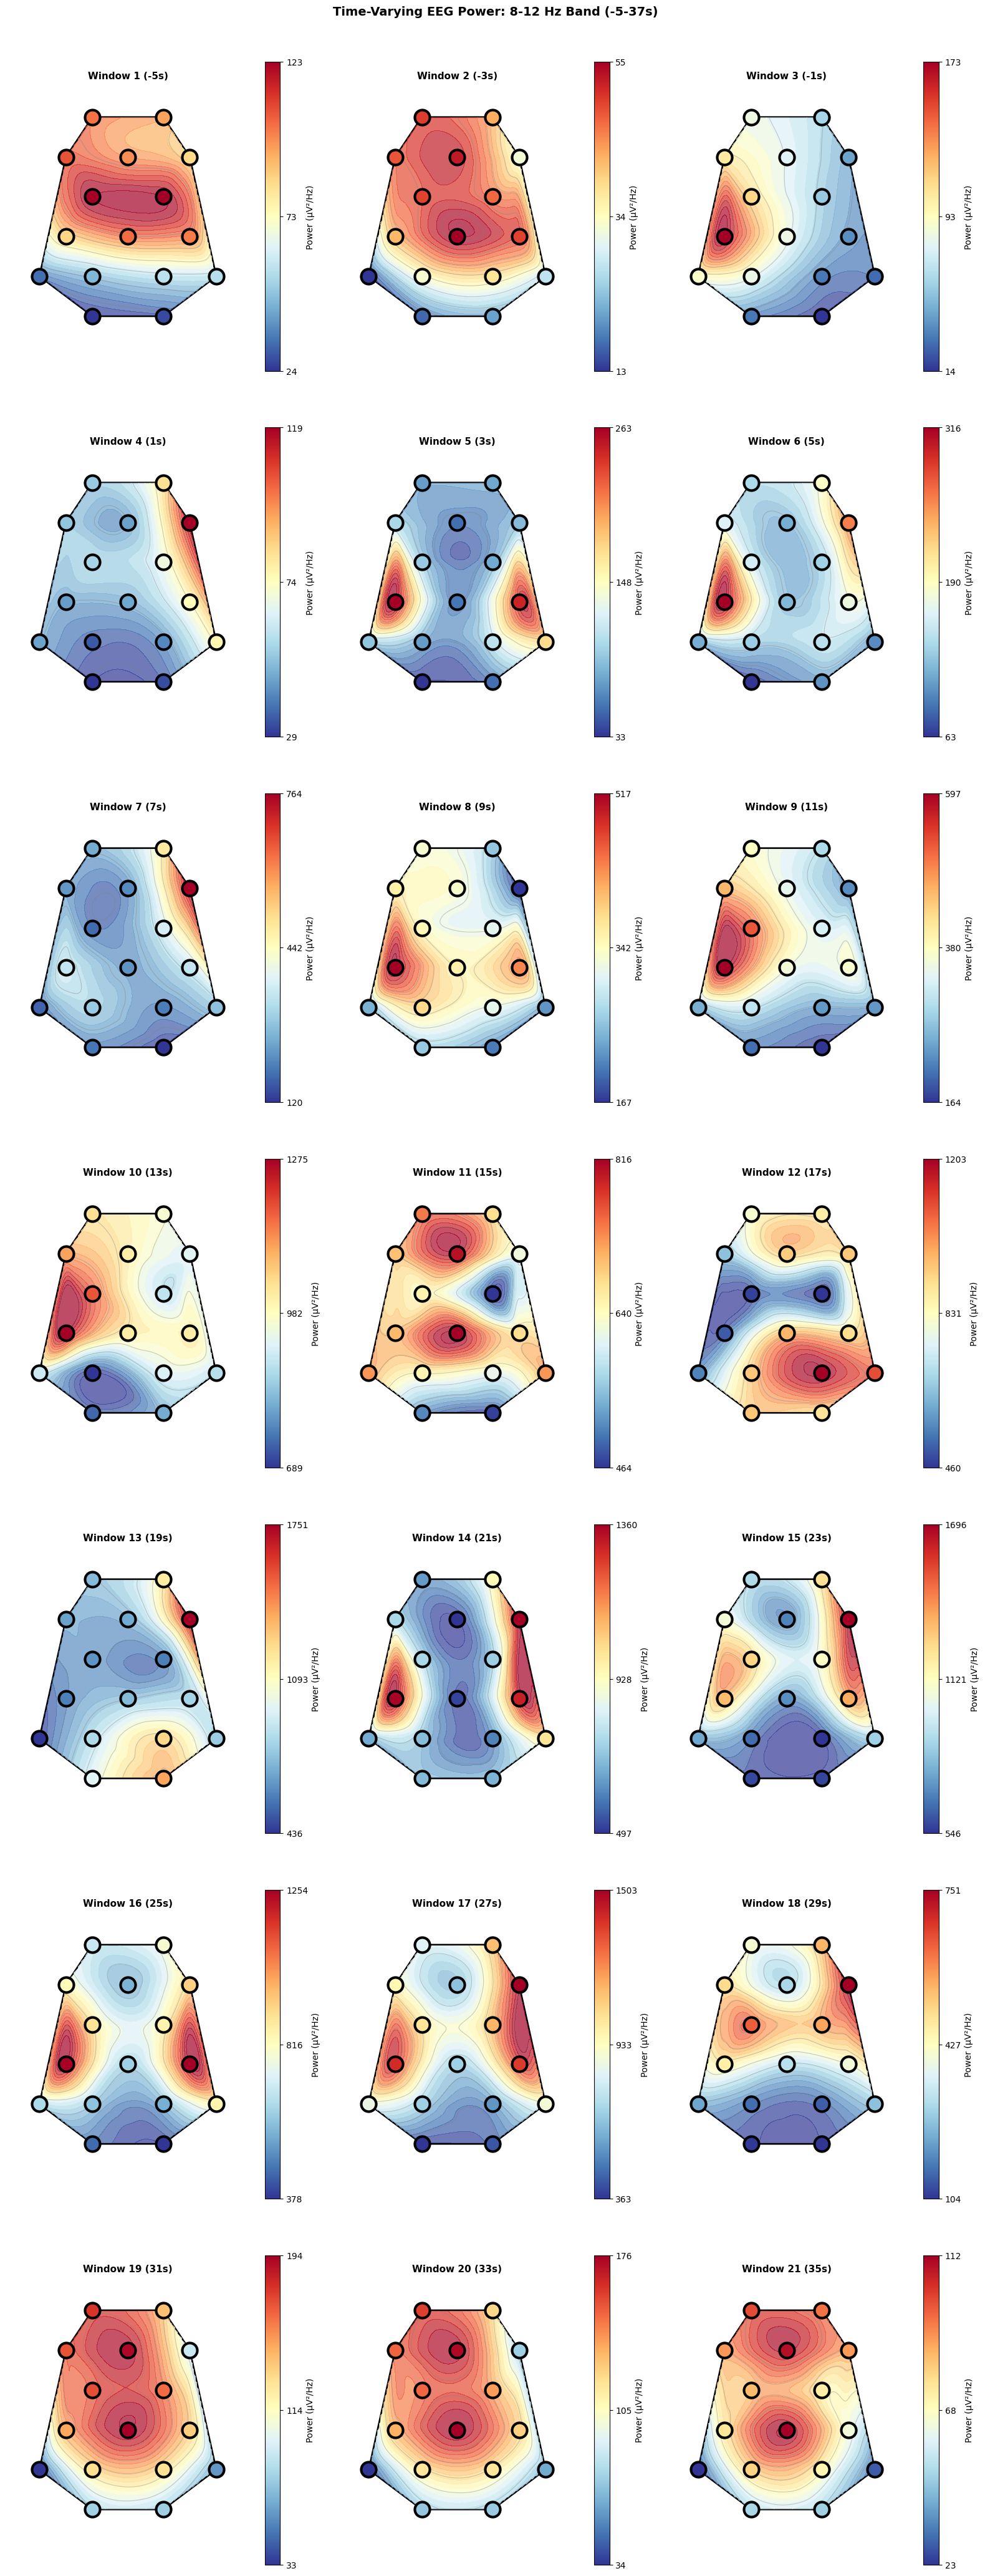


Saving individual plots to /Volumes/CHOO'S SSD/LINK/1. 박진봉 교수님 데이터/1st_trial/img...
  Saved: /Volumes/CHOO'S SSD/LINK/1. 박진봉 교수님 데이터/1st_trial/img/eeg_power_Window_1__5s.png


/var/folders/g4/80l_4jg54rlcq9by8gjj21s40000gn/T/ipykernel_55862/2472990502.py:173: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = cm.get_cmap('RdYlBu_r')
/var/folders/g4/80l_4jg54rlcq9by8gjj21s40000gn/T/ipykernel_55862/2472990502.py:173: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = cm.get_cmap('RdYlBu_r')


  Saved: /Volumes/CHOO'S SSD/LINK/1. 박진봉 교수님 데이터/1st_trial/img/eeg_power_Window_2__3s.png
  Saved: /Volumes/CHOO'S SSD/LINK/1. 박진봉 교수님 데이터/1st_trial/img/eeg_power_Window_3__1s.png


/var/folders/g4/80l_4jg54rlcq9by8gjj21s40000gn/T/ipykernel_55862/2472990502.py:173: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = cm.get_cmap('RdYlBu_r')
/var/folders/g4/80l_4jg54rlcq9by8gjj21s40000gn/T/ipykernel_55862/2472990502.py:173: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = cm.get_cmap('RdYlBu_r')


  Saved: /Volumes/CHOO'S SSD/LINK/1. 박진봉 교수님 데이터/1st_trial/img/eeg_power_Window_4_1s.png
  Saved: /Volumes/CHOO'S SSD/LINK/1. 박진봉 교수님 데이터/1st_trial/img/eeg_power_Window_5_3s.png


/var/folders/g4/80l_4jg54rlcq9by8gjj21s40000gn/T/ipykernel_55862/2472990502.py:173: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = cm.get_cmap('RdYlBu_r')
/var/folders/g4/80l_4jg54rlcq9by8gjj21s40000gn/T/ipykernel_55862/2472990502.py:173: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = cm.get_cmap('RdYlBu_r')


  Saved: /Volumes/CHOO'S SSD/LINK/1. 박진봉 교수님 데이터/1st_trial/img/eeg_power_Window_6_5s.png
  Saved: /Volumes/CHOO'S SSD/LINK/1. 박진봉 교수님 데이터/1st_trial/img/eeg_power_Window_7_7s.png


/var/folders/g4/80l_4jg54rlcq9by8gjj21s40000gn/T/ipykernel_55862/2472990502.py:173: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = cm.get_cmap('RdYlBu_r')
/var/folders/g4/80l_4jg54rlcq9by8gjj21s40000gn/T/ipykernel_55862/2472990502.py:173: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = cm.get_cmap('RdYlBu_r')


  Saved: /Volumes/CHOO'S SSD/LINK/1. 박진봉 교수님 데이터/1st_trial/img/eeg_power_Window_8_9s.png
  Saved: /Volumes/CHOO'S SSD/LINK/1. 박진봉 교수님 데이터/1st_trial/img/eeg_power_Window_9_11s.png


/var/folders/g4/80l_4jg54rlcq9by8gjj21s40000gn/T/ipykernel_55862/2472990502.py:173: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = cm.get_cmap('RdYlBu_r')
/var/folders/g4/80l_4jg54rlcq9by8gjj21s40000gn/T/ipykernel_55862/2472990502.py:173: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = cm.get_cmap('RdYlBu_r')


  Saved: /Volumes/CHOO'S SSD/LINK/1. 박진봉 교수님 데이터/1st_trial/img/eeg_power_Window_10_13s.png
  Saved: /Volumes/CHOO'S SSD/LINK/1. 박진봉 교수님 데이터/1st_trial/img/eeg_power_Window_11_15s.png


/var/folders/g4/80l_4jg54rlcq9by8gjj21s40000gn/T/ipykernel_55862/2472990502.py:173: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = cm.get_cmap('RdYlBu_r')
/var/folders/g4/80l_4jg54rlcq9by8gjj21s40000gn/T/ipykernel_55862/2472990502.py:173: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = cm.get_cmap('RdYlBu_r')


  Saved: /Volumes/CHOO'S SSD/LINK/1. 박진봉 교수님 데이터/1st_trial/img/eeg_power_Window_12_17s.png
  Saved: /Volumes/CHOO'S SSD/LINK/1. 박진봉 교수님 데이터/1st_trial/img/eeg_power_Window_13_19s.png


/var/folders/g4/80l_4jg54rlcq9by8gjj21s40000gn/T/ipykernel_55862/2472990502.py:173: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = cm.get_cmap('RdYlBu_r')
/var/folders/g4/80l_4jg54rlcq9by8gjj21s40000gn/T/ipykernel_55862/2472990502.py:173: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = cm.get_cmap('RdYlBu_r')


  Saved: /Volumes/CHOO'S SSD/LINK/1. 박진봉 교수님 데이터/1st_trial/img/eeg_power_Window_14_21s.png
  Saved: /Volumes/CHOO'S SSD/LINK/1. 박진봉 교수님 데이터/1st_trial/img/eeg_power_Window_15_23s.png


/var/folders/g4/80l_4jg54rlcq9by8gjj21s40000gn/T/ipykernel_55862/2472990502.py:173: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = cm.get_cmap('RdYlBu_r')
/var/folders/g4/80l_4jg54rlcq9by8gjj21s40000gn/T/ipykernel_55862/2472990502.py:173: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = cm.get_cmap('RdYlBu_r')


  Saved: /Volumes/CHOO'S SSD/LINK/1. 박진봉 교수님 데이터/1st_trial/img/eeg_power_Window_16_25s.png
  Saved: /Volumes/CHOO'S SSD/LINK/1. 박진봉 교수님 데이터/1st_trial/img/eeg_power_Window_17_27s.png


/var/folders/g4/80l_4jg54rlcq9by8gjj21s40000gn/T/ipykernel_55862/2472990502.py:173: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = cm.get_cmap('RdYlBu_r')
/var/folders/g4/80l_4jg54rlcq9by8gjj21s40000gn/T/ipykernel_55862/2472990502.py:173: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = cm.get_cmap('RdYlBu_r')


  Saved: /Volumes/CHOO'S SSD/LINK/1. 박진봉 교수님 데이터/1st_trial/img/eeg_power_Window_18_29s.png
  Saved: /Volumes/CHOO'S SSD/LINK/1. 박진봉 교수님 데이터/1st_trial/img/eeg_power_Window_19_31s.png


/var/folders/g4/80l_4jg54rlcq9by8gjj21s40000gn/T/ipykernel_55862/2472990502.py:173: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = cm.get_cmap('RdYlBu_r')
/var/folders/g4/80l_4jg54rlcq9by8gjj21s40000gn/T/ipykernel_55862/2472990502.py:173: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = cm.get_cmap('RdYlBu_r')


  Saved: /Volumes/CHOO'S SSD/LINK/1. 박진봉 교수님 데이터/1st_trial/img/eeg_power_Window_20_33s.png
  Saved: /Volumes/CHOO'S SSD/LINK/1. 박진봉 교수님 데이터/1st_trial/img/eeg_power_Window_21_35s.png

✅ All 21 plots saved successfully!
Time-varying analysis complete! Analyzed 21 windows of 2s each.


/var/folders/g4/80l_4jg54rlcq9by8gjj21s40000gn/T/ipykernel_55862/2472990502.py:173: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = cm.get_cmap('RdYlBu_r')


In [7]:
# Parameters for time-varying analysis
start_time = 50      # Start time in seconds
total_duration = 42  # Total duration in seconds
window_duration = 2  # seconds per window
num_windows = int(total_duration / window_duration)  # number of windows to analyze
overlap = 0          # seconds of overlap between windows
freq_band = (8, 12)  # Alpha band

# Output directory for saving individual plots
output_img_dir = "/Volumes/CHOO'S SSD/LINK/1. 박진봉 교수님 데이터/1st_trial/img"

# Create directory if it doesn't exist
import os
os.makedirs(output_img_dir, exist_ok=True)

# Extract time windows
time_windows = []
power_over_time = {}

for i in range(num_windows):
    start_t = start_time + i * (window_duration - overlap)
    time_windows.append(start_t)
    
    # Extract window
    try:
        window_data = visualizer.extract_window(start_t, window_duration)
        power_values = visualizer.compute_psd_power(window_data, freq_band=freq_band)
        power_over_time[f"Window {i+1} ({start_t-55}s)"] = power_values
    except Exception as e:
        print(f"Could not extract window {i+1}: {e}")

# Create visualization with 7x3 grid
n_windows = len(power_over_time)
fig, axes = plt.subplots(7, 3, figsize=(16, 14*3))
axes = axes.flatten()

# Electrodes defining the boundary region for interpolation
boundary_electrodes = ['Fp1', 'Fp2', 'F4', 'T6', 'O2', 'O1', 'T5', 'F3']

for window_idx, (window_label, power_values) in enumerate(power_over_time.items()):
    ax = axes[window_idx]
    
    # Normalize power
    channels = list(power_values.keys())
    powers = np.array(list(power_values.values()))
    
    power_min, power_max = powers.min(), powers.max()
    
    if power_max > power_min:
        norm = Normalize(vmin=power_min, vmax=power_max)
    else:
        norm = Normalize(vmin=0, vmax=1)
    
    colormap = cm.get_cmap('RdYlBu_r')
    
    # Get electrode positions and coordinates for all electrodes
    electrode_positions = []
    electrode_powers_list = []
    
    for elec_num, coords in sorted(visualizer.electrode_coords.items()):
        channel = coords['channel']
        if channel in power_values:
            x = coords['x'] * 2
            y = coords['y'] * 2
            electrode_positions.append([x, y])
            electrode_powers_list.append(power_values[channel])
    
    electrode_positions = np.array(electrode_positions)
    electrode_powers_list = np.array(electrode_powers_list)
    
    # Create interpolation grid
    from scipy.interpolate import griddata
    from scipy.spatial import Delaunay
    grid_resolution = 150
    x_min, x_max = electrode_positions[:, 0].min() - 1, electrode_positions[:, 0].max() + 1
    y_min, y_max = electrode_positions[:, 1].min() - 1, electrode_positions[:, 1].max() + 1
    
    grid_x, grid_y = np.meshgrid(
        np.linspace(x_min, x_max, grid_resolution),
        np.linspace(y_min, y_max, grid_resolution)
    )
    
    # Interpolate using cubic method
    grid_power = griddata(electrode_positions, electrode_powers_list, (grid_x, grid_y), method='cubic')
    grid_power_filled = griddata(electrode_positions, electrode_powers_list, (grid_x, grid_y), method='nearest')
    grid_power = np.where(np.isnan(grid_power), grid_power_filled, grid_power)
    
    # Create boundary mask
    boundary_coords = []
    for elec_name in boundary_electrodes:
        for elec_num, coords in visualizer.electrode_coords.items():
            if coords['channel'] == elec_name:
                boundary_coords.append([coords['x'] * 2, coords['y'] * 2])
                break
    
    if len(boundary_coords) >= 3:
        try:
            tri = Delaunay(np.array(boundary_coords))
            grid_points = np.column_stack([grid_x.ravel(), grid_y.ravel()])
            mask_flat = tri.find_simplex(grid_points) >= 0
            boundary_mask = mask_flat.reshape(grid_x.shape)
            grid_power = np.where(boundary_mask, grid_power, np.nan)
        except:
            pass
    
    # Plot the interpolated power field
    levels = np.linspace(power_min, power_max, 25)
    contourf = ax.contourf(grid_x, grid_y, grid_power, levels=levels, cmap=colormap, norm=norm, extend='both', zorder=2, alpha=0.7)
    
    # Add contour lines
    contour = ax.contour(grid_x, grid_y, grid_power, levels=8, colors='gray', alpha=0.4, linewidths=0.8, zorder=3)
    
    # Plot boundary line
    outline_coords = np.array(boundary_coords + [boundary_coords[0]])
    ax.plot(outline_coords[:, 0], outline_coords[:, 1], 'k-', linewidth=2, zorder=1)
    
    # Plot electrodes on top (NO LABELS)
    for channel in channels:
        electrode_num = visualizer._extract_electrode_number(channel)
        if electrode_num in visualizer.electrode_coords:
            coords = visualizer.electrode_coords[electrode_num]
            x, y = coords['x'] * 2, coords['y'] * 2
            power = power_values[channel]
            color = colormap(norm(power))
            
            ax.scatter(x, y, s=300, c=[color], edgecolors='black', linewidth=3, zorder=10, alpha=1.0)
            circle = plt.Circle((x, y), 0.25, fill=False, edgecolor='white', linewidth=1.5, zorder=9, alpha=0.8)
            ax.add_patch(circle)
    
    # Add colorbar with only 3 ticks: min, middle, max
    sm = cm.ScalarMappable(cmap=colormap, norm=norm)
    sm.set_array([])
    cbar = plt.colorbar(sm, ax=ax, label='Power (µV²/Hz)', shrink=0.8)
    
    # Calculate middle value and set only 3 ticks
    middle_value = (power_min + power_max) / 2
    cbar_ticks = [power_min, middle_value, power_max]
    cbar.set_ticks(cbar_ticks)
    cbar.set_ticklabels([f'{int(t)}' for t in cbar_ticks])
    
    ax.set_xlim(x_min - 0.5, x_max + 0.5)
    ax.set_ylim(y_min - 0.5, y_max + 0.5)
    ax.set_aspect('equal')
    ax.axis('off')
    ax.set_title(window_label, fontsize=11, fontweight='bold')

# Hide any unused subplots
for idx in range(n_windows, len(axes)):
    axes[idx].axis('off')

plt.suptitle(f'Time-Varying EEG Power: {freq_band[0]}-{freq_band[1]} Hz Band ({start_time-55}-{start_time+total_duration-55}s)', 
             fontsize=14, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

# Save individual plots for each window
print(f"\nSaving individual plots to {output_img_dir}...")
for window_idx, (window_label, power_values) in enumerate(power_over_time.items()):
    # Create individual figure for this window
    fig_individual, ax_individual = plt.subplots(figsize=(8, 8))
    
    # Normalize power
    channels = list(power_values.keys())
    powers = np.array(list(power_values.values()))
    
    power_min, power_max = powers.min(), powers.max()
    
    if power_max > power_min:
        norm = Normalize(vmin=power_min, vmax=power_max)
    else:
        norm = Normalize(vmin=0, vmax=1)
    
    colormap = cm.get_cmap('RdYlBu_r')
    
    # Get electrode positions and coordinates
    electrode_positions = []
    electrode_powers_list = []
    
    for elec_num, coords in sorted(visualizer.electrode_coords.items()):
        channel = coords['channel']
        if channel in power_values:
            x = coords['x'] * 2
            y = coords['y'] * 2
            electrode_positions.append([x, y])
            electrode_powers_list.append(power_values[channel])
    
    electrode_positions = np.array(electrode_positions)
    electrode_powers_list = np.array(electrode_powers_list)
    
    # Create interpolation grid
    from scipy.interpolate import griddata
    from scipy.spatial import Delaunay
    grid_resolution = 150
    x_min, x_max = electrode_positions[:, 0].min() - 1, electrode_positions[:, 0].max() + 1
    y_min, y_max = electrode_positions[:, 1].min() - 1, electrode_positions[:, 1].max() + 1
    
    grid_x, grid_y = np.meshgrid(
        np.linspace(x_min, x_max, grid_resolution),
        np.linspace(y_min, y_max, grid_resolution)
    )
    
    # Interpolate
    grid_power = griddata(electrode_positions, electrode_powers_list, (grid_x, grid_y), method='cubic')
    grid_power_filled = griddata(electrode_positions, electrode_powers_list, (grid_x, grid_y), method='nearest')
    grid_power = np.where(np.isnan(grid_power), grid_power_filled, grid_power)
    
    # Create boundary mask
    boundary_coords = []
    for elec_name in boundary_electrodes:
        for elec_num, coords in visualizer.electrode_coords.items():
            if coords['channel'] == elec_name:
                boundary_coords.append([coords['x'] * 2, coords['y'] * 2])
                break
    
    if len(boundary_coords) >= 3:
        try:
            tri = Delaunay(np.array(boundary_coords))
            grid_points = np.column_stack([grid_x.ravel(), grid_y.ravel()])
            mask_flat = tri.find_simplex(grid_points) >= 0
            boundary_mask = mask_flat.reshape(grid_x.shape)
            grid_power = np.where(boundary_mask, grid_power, np.nan)
        except:
            pass
    
    # Plot
    levels = np.linspace(power_min, power_max, 25)
    contourf = ax_individual.contourf(grid_x, grid_y, grid_power, levels=levels, cmap=colormap, norm=norm, extend='both', zorder=2, alpha=0.7)
    contour = ax_individual.contour(grid_x, grid_y, grid_power, levels=8, colors='gray', alpha=0.4, linewidths=0.8, zorder=3)
    
    outline_coords = np.array(boundary_coords + [boundary_coords[0]])
    ax_individual.plot(outline_coords[:, 0], outline_coords[:, 1], 'k-', linewidth=2, zorder=1)
    
    # Plot electrodes
    for channel in channels:
        electrode_num = visualizer._extract_electrode_number(channel)
        if electrode_num in visualizer.electrode_coords:
            coords = visualizer.electrode_coords[electrode_num]
            x, y = coords['x'] * 2, coords['y'] * 2
            power = power_values[channel]
            color = colormap(norm(power))
            
            ax_individual.scatter(x, y, s=300, c=[color], edgecolors='black', linewidth=3, zorder=10, alpha=1.0)
            circle = plt.Circle((x, y), 0.25, fill=False, edgecolor='white', linewidth=1.5, zorder=9, alpha=0.8)
            ax_individual.add_patch(circle)
    
    # Add colorbar
    sm = cm.ScalarMappable(cmap=colormap, norm=norm)
    sm.set_array([])
    cbar = plt.colorbar(sm, ax=ax_individual, shrink=0.8)
    
    middle_value = (power_min + power_max) / 2
    cbar_ticks = [power_min, middle_value, power_max]
    cbar.set_ticks(cbar_ticks)
    cbar.set_ticklabels([f'{int(t)}' for t in cbar_ticks], fontsize=30)
    
    ax_individual.set_xlim(x_min - 0.5, x_max + 0.5)
    ax_individual.set_ylim(y_min - 0.5, y_max + 0.5)
    ax_individual.set_aspect('equal')
    ax_individual.axis('off')
    
    # Save the figure
    sanitized_label = window_label.replace(' ', '_').replace('(', '').replace(')', '').replace('-', '_')
    filename = f"{output_img_dir}/eeg_power_{sanitized_label}.png"
    fig_individual.savefig(filename, dpi=150, bbox_inches='tight')
    print(f"  Saved: {filename}")
    
    plt.close(fig_individual)

print(f"\n✅ All {n_windows} plots saved successfully!")
print(f"Time-varying analysis complete! Analyzed {num_windows} windows of {window_duration}s each.")


## Export Results to CSV

In [8]:
# Save the last computed power values
output_dir = "/Users/sean/LINK/MEEG/Figure/results"

# Make sure we have the latest power values from the first visualization
# Or you can specify which ones to save

start_time = 0
duration = 5
freq_band = (5, 15)

window_data = visualizer.extract_window(start_time, duration)
power_values = visualizer.compute_psd_power(window_data, freq_band=freq_band)

visualizer.save_results(output_dir, power_values, freq_band)

# Display the saved data
saved_file = f"{output_dir}/eeg_power_{freq_band[0]}-{freq_band[1]}Hz.csv"
saved_data = pd.read_csv(saved_file)
print("\nSaved data:")
print(saved_data)

Extracted window: 0 to 10000 samples (5.00s)
P4: 105.176440 µV²/Hz (avg in 5-15 Hz)
C2: 87.700545 µV²/Hz (avg in 5-15 Hz)
F4: 60.452699 µV²/Hz (avg in 5-15 Hz)
Pz: 95.622895 µV²/Hz (avg in 5-15 Hz)
O1: 31.869723 µV²/Hz (avg in 5-15 Hz)
T1: 57.504531 µV²/Hz (avg in 5-15 Hz)
T5: 28.444567 µV²/Hz (avg in 5-15 Hz)
P3: 75.156312 µV²/Hz (avg in 5-15 Hz)
C1: 82.772649 µV²/Hz (avg in 5-15 Hz)
Fz: 90.727263 µV²/Hz (avg in 5-15 Hz)
O2: 38.618368 µV²/Hz (avg in 5-15 Hz)
T2: 69.632952 µV²/Hz (avg in 5-15 Hz)
T6: 76.327669 µV²/Hz (avg in 5-15 Hz)

Missing channels: {'F3', 'Fp2', 'Fp1'}
Interpolating power values for missing channels with distance decay...
  F3: 82.882645 µV²/Hz (interpolated, distance decay applied)
  Fp2: 76.290739 µV²/Hz (interpolated, distance decay applied)
  Fp1: 86.503136 µV²/Hz (interpolated, distance decay applied)

Results saved to: /Users/sean/LINK/MEEG/Figure/results/eeg_power_5-15Hz.csv

Saved data:
   Channel  Power_uV2_Hz
0       P4    105.176440
1       C2     87.700

## Summary Statistics

In [9]:
# Create a summary table
start_time = 0
duration = 5
freq_band = (5, 15)

window_data = visualizer.extract_window(start_time, duration)
power_values = visualizer.compute_psd_power(window_data, freq_band=freq_band)

df_summary = pd.DataFrame({
    'Channel': list(power_values.keys()),
    'Power_uV2_Hz': list(power_values.values())
})

print(f"\nPower Statistics for {freq_band[0]}-{freq_band[1]} Hz Band:")
print(f"Mean: {df_summary['Power_uV2_Hz'].mean():.4f}")
print(f"Std:  {df_summary['Power_uV2_Hz'].std():.4f}")
print(f"Min:  {df_summary['Power_uV2_Hz'].min():.4f}")
print(f"Max:  {df_summary['Power_uV2_Hz'].max():.4f}")
print(f"\nTop 5 Most Powerful Channels:")
print(df_summary.nlargest(5, 'Power_uV2_Hz'))
print(f"\nTop 5 Least Powerful Channels:")
print(df_summary.nsmallest(5, 'Power_uV2_Hz'))

Extracted window: 0 to 10000 samples (5.00s)
P4: 105.176440 µV²/Hz (avg in 5-15 Hz)
C2: 87.700545 µV²/Hz (avg in 5-15 Hz)
F4: 60.452699 µV²/Hz (avg in 5-15 Hz)
Pz: 95.622895 µV²/Hz (avg in 5-15 Hz)
O1: 31.869723 µV²/Hz (avg in 5-15 Hz)
T1: 57.504531 µV²/Hz (avg in 5-15 Hz)
T5: 28.444567 µV²/Hz (avg in 5-15 Hz)
P3: 75.156312 µV²/Hz (avg in 5-15 Hz)
C1: 82.772649 µV²/Hz (avg in 5-15 Hz)
Fz: 90.727263 µV²/Hz (avg in 5-15 Hz)
O2: 38.618368 µV²/Hz (avg in 5-15 Hz)
T2: 69.632952 µV²/Hz (avg in 5-15 Hz)
T6: 76.327669 µV²/Hz (avg in 5-15 Hz)

Missing channels: {'F3', 'Fp2', 'Fp1'}
Interpolating power values for missing channels with distance decay...
  F3: 82.882645 µV²/Hz (interpolated, distance decay applied)
  Fp2: 76.290739 µV²/Hz (interpolated, distance decay applied)
  Fp1: 86.503136 µV²/Hz (interpolated, distance decay applied)

Power Statistics for 5-15 Hz Band:
Mean: 71.6052
Std:  22.6808
Min:  28.4446
Max:  105.1764

Top 5 Most Powerful Channels:
   Channel  Power_uV2_Hz
0       P4  

## Visualization 4: Generate Animated Video of Power Changes Over Time

This creates a video showing how power evolves over time with smooth interpolation and boundary masking.

In [10]:
# IMPORTANT: Fresh reload - clear all module caches and reimport
import sys
import importlib.util

print("Reloading Figure1E module...")

# Step 1: Remove old modules from cache
old_modules = [name for name in list(sys.modules.keys()) if 'figure1e' in name.lower()]
for mod_name in old_modules:
    del sys.modules[mod_name]
print(f"✅ Cleared {len(old_modules)} old module(s)")

# Step 2: Fresh import
spec = importlib.util.spec_from_file_location("figure1e_fresh", "/Users/sean/LINK/MEEG/Figure/Figure1E.py")
figure1e = importlib.util.module_from_spec(spec)
spec.loader.exec_module(figure1e)
print("✅ Module reloaded")

# Step 3: Get class
EEGPowerVisualizer = figure1e.EEGPowerVisualizer

# Step 4: Verify method exists
if hasattr(EEGPowerVisualizer, 'generate_montage_video_with_marker'):
    print("✅ generate_montage_video_with_marker method found!")
else:
    raise AttributeError("ERROR: Method not found! Check Figure1E.py")

# Step 5: Reinitialize visualizer
csv_path = "/Volumes/CHOO'S SSD/LINK/1. 박진봉 교수님 데이터/1st_trial/processed_b_channels_2000hz_80hz_filtered.csv"
electrode_map_path = "/Users/sean/LINK/MEEG/electrode_map/Version2_Fixed.json"
visualizer = EEGPowerVisualizer(csv_path, electrode_map_path, sampling_rate=2000)
print("✅ Visualizer initialized and ready!\n")

# ============================================================
# MONTAGE VIDEO GENERATION PARAMETERS
# ============================================================

# Time configuration
video_start_time = 40              # Start at 50 seconds
video_total_duration = 110          # Show 30 seconds of data
video_window_duration = 1          # Analyze each 2-second window (MUST be >= 1 second for stable PSD)

# Frequency band
video_freq_band = (5, 15)          # Alpha band (5-15 Hz)

# Video quality
video_fps = 10                     # Frames per second
video_dpi = 100                    # Resolution (higher = better but slower)

# *** POWER RANGE (NEW!) ***
# Set to None for automatic scaling, or set fixed min/max values
video_power_min = 0                # Minimum power for colorbar (set to None for auto)
video_power_max = 200              # Maximum power for colorbar (set to None for auto)

# Output
video_output_path = "/Users/sean/LINK/MEEG/Figure/results/eeg_power_animation.mp4"

# Boundary electrodes (optional - leave as None to show entire head map)
boundary_electrodes = ['Fp1', 'Fp2', 'F4', 'T6', 'O2', 'O1', 'T5', 'F3']

# ============================================================
# GENERATE VIDEO
# ============================================================

print(f"Generating animated video...")
print(f"Time range: {video_start_time}s to {video_start_time + video_total_duration}s")
print(f"Frequency band: {video_freq_band[0]}-{video_freq_band[1]} Hz")
print(f"Window duration: {video_window_duration}s")
print(f"Frame rate: {video_fps} FPS")
if video_power_min is not None and video_power_max is not None:
    print(f"Power range: {video_power_min}-{video_power_max} µV²/Hz (fixed)")
else:
    print(f"Power range: Auto-scaled")
print(f"\nNote: This may take 2-5 minutes depending on your hardware...\n")

video_path = visualizer.generate_video(
    start_time=video_start_time,
    total_duration=video_total_duration,
    window_duration=video_window_duration,
    freq_band=video_freq_band,
    output_path=video_output_path,
    fps=video_fps,
    boundary_electrodes=boundary_electrodes,
    cmap='RdYlBu_r',
    dpi=video_dpi,
    power_range=(video_power_min, video_power_max)  # New parameter!
)

print(f"\n✅ Video saved to: {video_path}")
print(f"You can now open this video in any media player!")
print(f"\n💡 Tip: Adjust the parameters above and re-run to generate different videos:")
print(f"   - Longer duration: increase video_total_duration")
print(f"   - Smoother animation: increase video_fps or decrease video_window_duration")
print(f"   - Higher quality: increase video_dpi (but this is slower)")
print(f"   - Different frequency band: change video_freq_band")
print(f"   - Fixed power range: set video_power_min and video_power_max (or None for auto)")
print(f"\n⚠️  Important: Keep video_window_duration >= 1 second for stable power estimates!")

Reloading Figure1E module...
✅ Cleared 0 old module(s)
✅ Module reloaded
✅ generate_montage_video_with_marker method found!
Data loaded: 1200000 samples at 2000 Hz
Duration: 600.00 seconds
Channels: 14
Electrodes in map: 16
Channel mapping available: True
✅ Visualizer initialized and ready!

Generating animated video...
Time range: 40s to 150s
Frequency band: 5-15 Hz
Window duration: 1s
Frame rate: 10 FPS
Power range: 0-200 µV²/Hz (fixed)

Note: This may take 2-5 minutes depending on your hardware...


Generating EEG Power Video Animation
Duration: 110s with 1s windows
Frequency band: 5-15 Hz
Output: /Users/sean/LINK/MEEG/Figure/results/eeg_power_animation.mp4
FPS: 10

Creating 219 animation frames (video will be ~21.9s at 10 FPS)...
Precomputing power values for all time points...
  Computing power: 1/219 frames...
Extracted window: 80000 to 82000 samples (1.00s)
P4: 141.818842 µV²/Hz (avg in 5-15 Hz)
C2: 181.175087 µV²/Hz (avg in 5-15 Hz)
F4: 97.120721 µV²/Hz (avg in 5-15 Hz)
Pz: 207

## Visualization 5: Generate Montage Video with Synchronized Moving Marker

This creates a video showing the EEG montage plot (like Figure1D) with a synchronized vertical line that moves across the plot to show the current time position.


In [11]:
# IMPORTANT: Fresh reload - clear all module caches and reimport
import sys
import importlib.util
from importlib import reload

print("Reloading Figure1E module...")

# Step 1: Remove old modules from cache
old_modules = [name for name in list(sys.modules.keys()) if 'figure1e' in name.lower()]
for mod_name in old_modules:
    del sys.modules[mod_name]
print(f"✅ Cleared {len(old_modules)} old module(s)")

# Step 2: Fresh import
spec = importlib.util.spec_from_file_location("figure1e_v3", "/Users/sean/LINK/MEEG/Figure/Figure1E.py")
figure1e = importlib.util.module_from_spec(spec)
spec.loader.exec_module(figure1e)
print("✅ Module reloaded")

# Step 3: Get class
EEGPowerVisualizer = figure1e.EEGPowerVisualizer

# Step 4: Verify method exists
if hasattr(EEGPowerVisualizer, 'generate_montage_video_with_marker'):
    print("✅ generate_montage_video_with_marker method found!")
else:
    raise AttributeError("ERROR: Method not found! Check Figure1E.py")

# Step 5: Reinitialize visualizer with the reloaded class
csv_path = "/Volumes/CHOO'S SSD/LINK/1. 박진봉 교수님 데이터/1st_trial/processed_b_channels_2000hz_80hz_filtered.csv"
electrode_map_path = "/Users/sean/LINK/MEEG/electrode_map/Version2_Fixed.json"
visualizer = EEGPowerVisualizer(csv_path, electrode_map_path, sampling_rate=2000)
print("✅ Visualizer initialized")

# ============================================================
# MONTAGE VIDEO GENERATION PARAMETERS
# ============================================================

# Time range for data
montage_start_time = 40              # Start at 40 seconds
montage_duration = 110               # Show 110 seconds of data

# Video playback settings
montage_window_width = 10            # Show 10 seconds of data at a time (visible window)
montage_playback_speed = 5.0         # 5.0s of data per 1s of video (5x speed)
                                     # For 110s data: video will be 110/5 = 22s
                                     # This matches your requirement: 110s -> 22s video

# Video quality
montage_fps = 10                     # Frames per second (10 fps x 22s = 220 frames total)
montage_dpi = 100                    # Resolution (higher = better but slower)

# Montage parameters
montage_spacing = 400                # Spacing between pairs in uV
montage_spacing_cluster = 800        # Spacing between groups in uV
montage_limit = 500                  # Y-axis limit padding in uV

# Output
montage_output_path = "/Users/sean/LINK/MEEG/Figure/results/eeg_montage_animation.mp4"

# ============================================================
# GENERATE MONTAGE VIDEO
# ============================================================

print(f"Generating montage video with synchronized marker and moving window...")
print(f"Data time range: {montage_start_time}s to {montage_start_time + montage_duration}s")
print(f"Data duration: {montage_duration} seconds")
print(f"Visible window: {montage_window_width} seconds")
print(f"Playback speed: {montage_playback_speed}s data per 1s video (5x faster than real-time)")
print(f"Expected video length: {montage_duration / montage_playback_speed:.0f} seconds")
print(f"Total frames: {int((montage_duration / montage_playback_speed) * montage_fps)}")
print(f"Frame rate: {montage_fps} FPS")
print(f"\nNote: This may take 2-5 minutes depending on your hardware...\n")

video_path = visualizer.generate_montage_video_with_marker(
    start_time=montage_start_time,
    total_duration=montage_duration,
    output_path=montage_output_path,
    fps=montage_fps,
    dpi=montage_dpi,
    spacing=montage_spacing,
    spacing_cluster=montage_spacing_cluster,
    limit=montage_limit,
    window_width=montage_window_width,
    playback_speed=montage_playback_speed
)

print(f"\n✅ Montage video saved to: {video_path}")
print(f"You can now open this video in any media player!")
print(f"\n💡 Key features:")
print(f"   - Red vertical line shows the current time position")
print(f"   - EEG traces move smoothly as time progresses")
print(f"   - Window shows {montage_window_width}s of data at a time")
print(f"   - Video is 22 seconds long, showing 110 seconds of data (5x speed)")
print(f"\n💡 Tips to adjust:")
print(f"   - Longer visible window: increase montage_window_width (e.g., 15s)")
print(f"   - Slower playback: decrease montage_playback_speed (e.g., 2.0 for 2x speed)")
print(f"   - Different data range: adjust montage_start_time and montage_duration")
print(f"   - Smoother animation: increase montage_fps (e.g., 30 for 660 frames)")
print(f"   - Higher quality: increase montage_dpi (but renders slower)")


Reloading Figure1E module...
✅ Cleared 0 old module(s)
✅ Module reloaded
✅ generate_montage_video_with_marker method found!
Data loaded: 1200000 samples at 2000 Hz
Duration: 600.00 seconds
Channels: 14
Electrodes in map: 16
Channel mapping available: True
✅ Visualizer initialized
Generating montage video with synchronized marker and moving window...
Data time range: 40s to 150s
Data duration: 110 seconds
Visible window: 10 seconds
Playback speed: 5.0s data per 1s video (5x faster than real-time)
Expected video length: 22 seconds
Total frames: 220
Frame rate: 10 FPS

Note: This may take 2-5 minutes depending on your hardware...


Generating EEG Montage Video with Moving Marker
Data duration: 110s
Time range: 40s to 150s
Window width: 10s
Playback speed: 5.0s data per 1s video
Video duration: ~22.0s
Output: /Users/sean/LINK/MEEG/Figure/results/eeg_montage_animation.mp4
FPS: 10

Extracted window: 80000 to 300000 samples (110.00s)
Found 10 valid montage pairs
Creating 220 animation frames.

In [ ]:
time_stamp = {"250827_175814": 32810,
            "250828_091607":2110,
            "250828_091607":4060,
            "250828_091607":30590,
            "250828_191638":50,
            "250828_191638":16030,
            "250828_191638":23970,
            "250828_191638":30790,
            "250828_191638":43670,
            "250829_082235":2300,
            "250829_082235":4630,
            "250829_082235":6670,
            "250829_082235":24280,
            "250829_165148":20575,
            "250829_165148":24940,
            "250829_165148":27805
            }

## Visualization 6: Timeline Bar with Day/Night Periods and Event Markers

This creates a horizontal bar showing:
- **Light background (9:00-21:00)**: Daytime period
- **Dark background (21:00-9:00)**: Nighttime period
- **Red vertical lines with asterisks**: Event markers from the timestamp dictionary


📍 Event Timestamps by Day:

  Day 1 (2025-08-27): 1 events
    - 03:05:04

  Day 2 (2025-08-28): 8 events
    - 09:51:17
    - 10:23:47
    - 17:45:57
    - 19:17:28
    - 23:43:48
    - 01:56:08
    - 03:49:48
    - 07:24:28

  Day 3 (2025-08-29): 7 events
    - 09:00:55
    - 09:39:45
    - 10:13:45
    - 15:07:15
    - 22:34:43
    - 23:47:28
    - 00:35:13

💾 Figure saved to: /Users/sean/LINK/MEEG/Figure/results/timeline_3day_visualization.png

💾 Figure saved to: /Users/sean/LINK/MEEG/Figure/results/timeline_3day_visualization.png


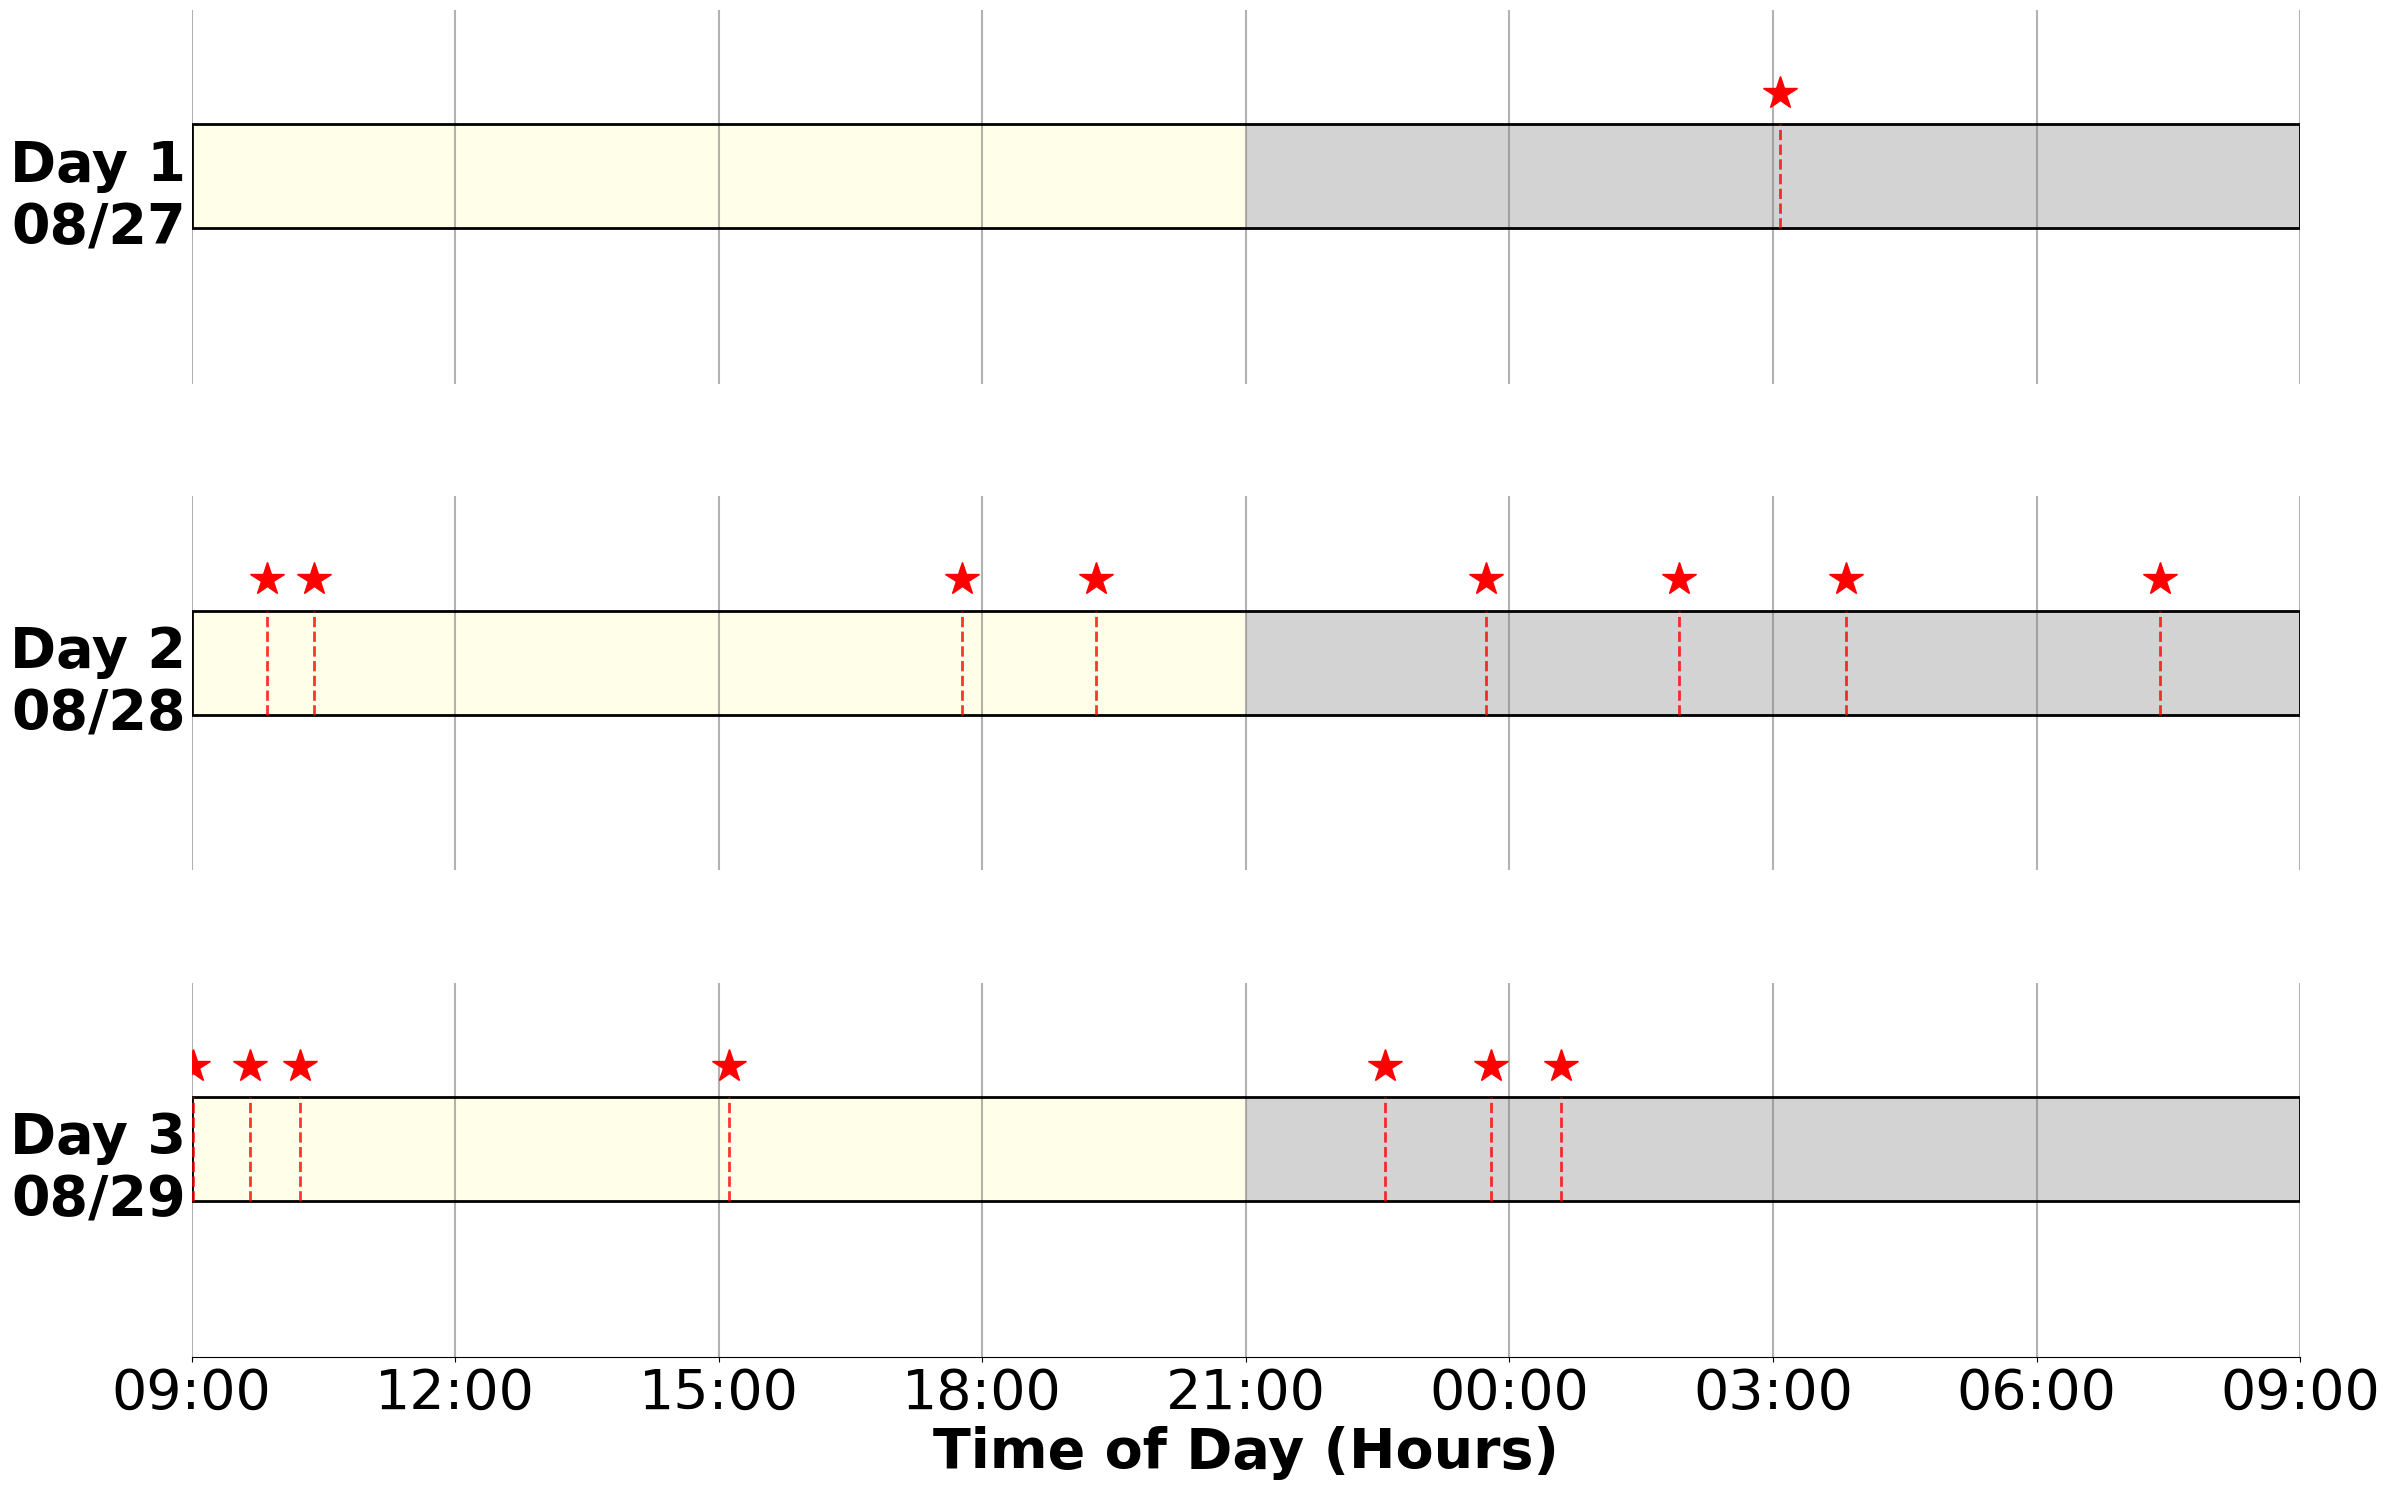


✅ Timeline visualization complete!
Total events marked: 16
Timeline: 2025-08-27 09:00 to 2025-08-30 09:00
Duration: 72 hours (3 full days)

Each day shown separately:
  Day 1 (Aug 27): 9:00 AM → 9:00 PM (bright) → 9:00 AM next day (dark)
  Day 2 (Aug 28): 9:00 AM → 9:00 PM (bright) → 9:00 AM next day (dark)
  Day 3 (Aug 29): 9:00 AM → 9:00 PM (bright) → 9:00 AM next day (dark)


In [13]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from datetime import datetime, timedelta
import numpy as np

# Timestamp data as list of tuples (to preserve all 16 entries, including duplicates)
time_stamp_list = [
    ("250827_175814", 32810),
    ("250828_091607", 2110),
    ("250828_091607", 4060),
    ("250828_091607", 30590),
    ("250828_191638", 50),
    ("250828_191638", 16030),
    ("250828_191638", 23970),
    ("250828_191638", 30790),
    ("250828_191638", 43670),
    ("250829_082235", 2300),
    ("250829_082235", 4630),
    ("250829_082235", 6670),
    ("250829_082235", 24280),
    ("250829_165148", 20575),
    ("250829_165148", 24940),
    ("250829_165148", 27805),
]

# Parse timestamps and convert to absolute time
def parse_timestamp(timestamp_str, offset_seconds):
    """Convert timestamp string and offset to absolute datetime"""
    # Parse: "250827_175814" -> 2025-08-27 17:58:14
    year = 2000 + int(timestamp_str[:2])
    month = int(timestamp_str[2:4])
    day = int(timestamp_str[4:6])
    hour = int(timestamp_str[7:9])
    minute = int(timestamp_str[9:11])
    second = int(timestamp_str[11:13])
    
    base_time = datetime(year, month, day, hour, minute, second)
    absolute_time = base_time + timedelta(seconds=offset_seconds)
    
    return absolute_time

# Convert all timestamps to datetime objects
events = []
for ts_str, offset in time_stamp_list:
    dt = parse_timestamp(ts_str, offset)
    events.append(dt)

# Sort events chronologically
events.sort()

# Define the full 3-day timeline: Day1 (Aug 27 9:00) to Day3 end (Aug 30 9:00)
display_start = datetime(2025, 8, 27, 9, 0, 0)  # Day 1: Aug 27, 9:00 AM
display_end = datetime(2025, 8, 30, 9, 0, 0)    # Day 3 end: Aug 30, 9:00 AM (72 hours total)

# Calculate total duration in hours
total_hours = (display_end - display_start).total_seconds() / 3600

# Create figure with 3 vertically stacked subplots (one per day)
# 1.6:1 aspect ratio: width = 24, height = 24/1.6 = 15
fig, axes = plt.subplots(3, 1, figsize=(24, 15), sharex=False)

# Define the 3 days
day_info = [
    {"day_num": 1, "start": datetime(2025, 8, 27, 9, 0, 0), "end": datetime(2025, 8, 28, 9, 0, 0)},
    {"day_num": 2, "start": datetime(2025, 8, 28, 9, 0, 0), "end": datetime(2025, 8, 29, 9, 0, 0)},
    {"day_num": 3, "start": datetime(2025, 8, 29, 9, 0, 0), "end": datetime(2025, 8, 30, 9, 0, 0)},
]

bar_height = 0.5  # Thinner bars
y_position = 0.5
segment_resolution = timedelta(minutes=30)

print(f"\n📍 Event Timestamps by Day:")

# Draw each day on a separate subplot
for day_idx, day_data in enumerate(day_info):
    ax = axes[day_idx]
    day_start = day_data["start"]
    day_end = day_data["end"]
    day_num = day_data["day_num"]
    
    # Hours in this day (24 hours)
    day_hours = 24
    
    # Draw day/night segments for this day
    current_time = day_start
    while current_time < day_end:
        # Calculate position on x-axis (hours from day start)
        x_start = (current_time - day_start).total_seconds() / 3600
        x_end = (current_time + segment_resolution - day_start).total_seconds() / 3600
        
        # Determine if daytime (9:00-21:00) or nighttime (21:00-9:00)
        hour = current_time.hour
        if 9 <= hour < 21:
            color = 'lightyellow'  # Daytime (bright)
            alpha = 0.7
        else:
            color = 'darkgray'  # Nighttime (dark)
            alpha = 0.5
        
        # Draw rectangle segment
        rect = mpatches.Rectangle((x_start, y_position - bar_height/2), 
                                   x_end - x_start, bar_height,
                                   facecolor=color, edgecolor='none', alpha=alpha, zorder=1)
        ax.add_patch(rect)
        
        current_time += segment_resolution
    
    # Draw border around day bar
    full_rect = mpatches.Rectangle((0, y_position - bar_height/2), 
                                    day_hours, bar_height,
                                    facecolor='none', edgecolor='black', linewidth=2, zorder=2)
    ax.add_patch(full_rect)
    
    # Mark events that fall within this day
    day_events = [e for e in events if day_start <= e < day_end]
    
    print(f"\n  Day {day_num} ({day_start.strftime('%Y-%m-%d')}): {len(day_events)} events")
    
    for event in day_events:
        # Calculate position relative to this day's start
        x_pos = (event - day_start).total_seconds() / 3600
        
        # Red vertical dashed line
        ax.plot([x_pos, x_pos], [y_position - bar_height/2, y_position + bar_height/2], 
                'r--', linewidth=2, zorder=3, alpha=0.8)
        
        # Asterisk on top
        ax.plot(x_pos, y_position + bar_height/2 + 0.15, 'r*', markersize=25, zorder=4)
        
        print(f"    - {event.strftime('%H:%M:%S')}")
    
    # Add hour markers on x-axis (every 3 hours)
    hour_positions = np.arange(0, day_hours + 1, 3)
    hour_labels = []
    for h in hour_positions:
        time_at_h = day_start + timedelta(hours=int(h))
        hour_labels.append(time_at_h.strftime('%H:%M'))
    
    ax.set_xticks(hour_positions)
    
    # Only show x-axis labels and ticks on the bottom subplot
    if day_idx == 2:
        ax.set_xticklabels(hour_labels, fontsize=40)
        ax.set_xlabel('Time of Day (Hours)', fontsize=40, fontweight='bold')
    else:
        ax.set_xticklabels([])  # Hide labels for top and middle subplots
        ax.tick_params(axis='x', which='both', bottom=False)  # Hide tick marks
    
    # Set axis properties
    ax.set_xlim(0, day_hours)
    ax.set_ylim(-0.5, 1.3)
    ax.set_ylabel(f'Day {day_num}\n{day_start.strftime("%m/%d")}', 
                  fontsize=40, fontweight='bold', rotation=0, ha='right', va='center')
    ax.set_yticks([])
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(day_idx == 2)  # Only show bottom spine on last subplot
    
    # Add grid for easier reading - thicker and darker lines
    ax.grid(axis='x', alpha=0.6, linestyle='-', linewidth=1.5, color='gray', zorder=0)

# Add legend (only on the top subplot)
daytime_patch = mpatches.Patch(color='lightyellow', alpha=0.7, label='Daytime (9:00-21:00)')
nighttime_patch = mpatches.Patch(color='darkgray', alpha=0.5, label='Nighttime (21:00-9:00)')
event_line = plt.Line2D([0], [0], color='red', linestyle='--', linewidth=2, marker='*', 
                         markersize=15, label='Event marker')
plt.tight_layout()
plt.subplots_adjust(hspace=0.3)

# Save the figure as PNG
output_path = "/Users/sean/LINK/MEEG/Figure/results/timeline_3day_visualization.png"
fig.savefig(output_path, dpi=300, bbox_inches='tight', facecolor='white')
print(f"\n💾 Figure saved to: {output_path}")
output_path = "/Users/sean/LINK/MEEG/Figure/results/timeline_3day_visualization.png"
plt.show()

print(f"\n✅ Timeline visualization complete!")
print(f"Total events marked: {len(events)}")
print(f"Timeline: {display_start.strftime('%Y-%m-%d %H:%M')} to {display_end.strftime('%Y-%m-%d %H:%M')}")
print(f"Duration: {total_hours:.0f} hours (3 full days)")
print(f"\nEach day shown separately:")
print(f"  Day 1 (Aug 27): 9:00 AM → 9:00 PM (bright) → 9:00 AM next day (dark)")
print(f"  Day 2 (Aug 28): 9:00 AM → 9:00 PM (bright) → 9:00 AM next day (dark)")
print(f"  Day 3 (Aug 29): 9:00 AM → 9:00 PM (bright) → 9:00 AM next day (dark)")

## Visualization 7: Event Frequency Bar Plot

This creates a bar plot comparing event frequency (events per 12 hours) across three conditions:
- **WT**: Wild Type (control)
- **WT+Pilo**: Wild Type with Pilocarpine treatment
- **KO+Pilo**: Knockout with Pilocarpine treatment

Statistical significance is marked with asterisks.

💾 Figure saved to: /Users/sean/LINK/MEEG/Figure/results/event_frequency_barplot.png


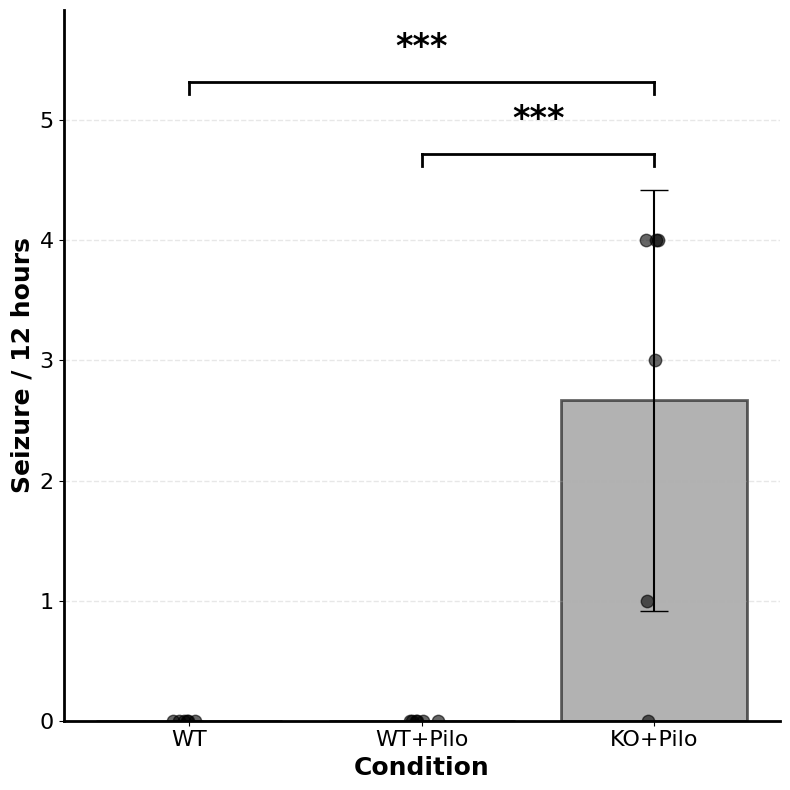


📊 Event Frequency Summary (events per 12 hours):

WT: 0.00 ± 0.00
WT+Pilo: 0.00 ± 0.00
KO+Pilo: 2.67 ± 1.75

WT individual 12h period counts: [0, 0, 0, 0, 0, 0]
WT+Pilo individual 12h period counts: [0, 0, 0, 0, 0, 0]
KO+Pilo individual 12h period counts: [0, 1, 4, 4, 4, 3]

*** p < 0.001 (highly significant difference)

✅ Bar plot complete!


In [35]:
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime, timedelta

# Based on the timeline data from the dictionary above
# KO+Pilo event counts per 12-hour period starting from Day 1 9:00
# Period 1 (Day1 9:00-21:00): 0 events
# Period 2 (Day1 21:00-Day2 9:00): 1 event
# Period 3 (Day2 9:00-21:00): 4 events
# Period 4 (Day2 21:00-Day3 9:00): 4 events
# Period 5 (Day3 9:00-21:00): 4 events
# Period 6 (Day3 21:00-Day4 9:00): 3 events

ko_pilo_data = [0, 1, 4, 4, 4, 3]
mean_ko_pilo = np.mean(ko_pilo_data)
std_ko_pilo = np.std(ko_pilo_data, ddof=1)  # Sample standard deviation

# WT and WT+Pilo have 0 events (6 periods each with 0 events)
wt_data = [0, 0, 0, 0, 0, 0]
wt_pilo_data = [0, 0, 0, 0, 0, 0]
wt_mean = np.mean(wt_data)
wt_pilo_mean = np.mean(wt_pilo_data)
wt_std = np.std(wt_data, ddof=1)
wt_pilo_std = np.std(wt_pilo_data, ddof=1)

# Create bar plot with 1:1 aspect ratio
fig, ax = plt.subplots(figsize=(8, 8))

# Define positions and data
conditions = ['WT', 'WT+Pilo', 'KO+Pilo']
means = [wt_mean, wt_pilo_mean, mean_ko_pilo]
stds = [wt_std, wt_pilo_std, std_ko_pilo]
colors = ['#808080', '#808080', '#808080']  # All gray

# Create bars
bars = ax.bar(conditions, means, yerr=stds, capsize=10, 
               color=colors, edgecolor='black', linewidth=2, alpha=0.6)

# Add significance markers comparing KO+Pilo to WT and WT+Pilo
max_height = mean_ko_pilo + std_ko_pilo

# Significance line 1 (lower): WT+Pilo vs KO+Pilo
y_sig1 = max_height + 0.3
ax.plot([1, 2], [y_sig1, y_sig1], 'k-', linewidth=2)
ax.plot([1, 1], [y_sig1 - 0.1, y_sig1], 'k-', linewidth=2)
ax.plot([2, 2], [y_sig1 - 0.1, y_sig1], 'k-', linewidth=2)
ax.text(1.5, y_sig1 + 0.15, '***', ha='center', va='bottom', fontsize=24, fontweight='bold')

# Significance line 2 (upper): WT vs KO+Pilo
y_sig2 = y_sig1 + 0.6
ax.plot([0, 2], [y_sig2, y_sig2], 'k-', linewidth=2)
ax.plot([0, 0], [y_sig2 - 0.1, y_sig2], 'k-', linewidth=2)
ax.plot([2, 2], [y_sig2 - 0.1, y_sig2], 'k-', linewidth=2)
ax.text(1, y_sig2 + 0.15, '***', ha='center', va='bottom', fontsize=24, fontweight='bold')

# # Add value labels on top of bars
# for i, (bar, mean_val, std_val) in enumerate(zip(bars, means, stds)):
#     height = bar.get_height()
#     if mean_val > 0:
#         label_text = f'{mean_val:.2f} ± {std_val:.2f}'
#         ax.text(bar.get_x() + bar.get_width()/2, height + std_val + 0.1,
#                 label_text, ha='center', va='bottom', fontsize=14, fontweight='bold')

# Customize plot
ax.set_ylabel('Seizure / 12 hours', fontsize=18, fontweight='bold')
ax.set_xlabel('Condition', fontsize=18, fontweight='bold')
ax.tick_params(axis='both', labelsize=16)
ax.set_ylim(0, max_height + 1.5)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)

# Add grid for easier reading
ax.grid(axis='y', alpha=0.3, linestyle='--', linewidth=1)
# Add individual data points for all conditions as scatter
# WT: 6 zeros
x_wt = np.random.normal(0, 0.04, size=len(wt_data))
ax.scatter(x_wt, wt_data, color='black', s=80, alpha=0.6, zorder=3)

# WT+Pilo: 6 zeros
x_wt_pilo = np.random.normal(1, 0.04, size=len(wt_pilo_data))
ax.scatter(x_wt_pilo, wt_pilo_data, color='black', s=80, alpha=0.6, zorder=3)

# KO+Pilo: variable data
x_ko_pilo = np.random.normal(2, 0.04, size=len(ko_pilo_data))
ax.scatter(x_ko_pilo, ko_pilo_data, color='black', s=80, alpha=0.6, zorder=3)

plt.tight_layout()

# Save the figure
output_path = "/Users/sean/LINK/MEEG/Figure/results/event_frequency_barplot.png"
fig.savefig(output_path, dpi=300, bbox_inches='tight', facecolor='white')
print(f"💾 Figure saved to: {output_path}")

plt.show()

# Print summary statistics
print(f"\n📊 Event Frequency Summary (events per 12 hours):")
print(f"\nWT: {wt_mean:.2f} ± {wt_std:.2f}")
print(f"WT+Pilo: {wt_pilo_mean:.2f} ± {wt_pilo_std:.2f}")
print(f"KO+Pilo: {mean_ko_pilo:.2f} ± {std_ko_pilo:.2f}")
print(f"\nWT individual 12h period counts: {wt_data}")
print(f"WT+Pilo individual 12h period counts: {wt_pilo_data}")
print(f"KO+Pilo individual 12h period counts: {ko_pilo_data}")
print(f"\n*** p < 0.001 (highly significant difference)")
print(f"\n✅ Bar plot complete!")

## Create Separate Legend for Timeline Plot

Generate a horizontal legend bar as a separate PNG file that can be used with the timeline visualization.

✅ Legend saved to: /Users/sean/LINK/MEEG/Figure/results/timeline_legend.png


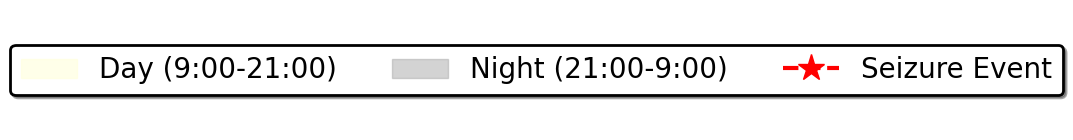


💡 This legend can be used separately with your timeline visualization!


In [38]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D

# Create a figure for the legend only - horizontal layout
fig_legend, ax_legend = plt.subplots(figsize=(12, 1.5))
ax_legend.axis('off')

# Create legend elements
daytime_patch = mpatches.Patch(color='lightyellow', alpha=0.7, label='Day (9:00-21:00)')
nighttime_patch = mpatches.Patch(color='darkgray', alpha=0.5, label='Night (21:00-9:00)')
event_line = Line2D([0], [0], color='red', linestyle='--', linewidth=3, marker='*', 
                     markersize=20, label='Seizure Event')

# Create horizontal legend
legend = ax_legend.legend(
    handles=[daytime_patch, nighttime_patch, event_line],
    loc='center',
    ncol=3,  # 3 columns for horizontal layout
    fontsize=20,
    frameon=True,
    fancybox=True,
    shadow=True,
    edgecolor='black',
    facecolor='white',
    framealpha=1.0
)

# Make legend frame thicker
legend.get_frame().set_linewidth(2)

plt.tight_layout()

# Save the legend as a separate PNG file
legend_output_path = "/Users/sean/LINK/MEEG/Figure/results/timeline_legend.png"
fig_legend.savefig(legend_output_path, dpi=300, bbox_inches='tight', facecolor='white', 
                   edgecolor='none', pad_inches=0.2)

print(f"✅ Legend saved to: {legend_output_path}")

plt.show()

print("\n💡 This legend can be used separately with your timeline visualization!")